<a href="https://colab.research.google.com/github/Kartikee12/DAV/blob/main/Exp5_DAV_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aim :** Implementation of ARIMA model in python

**Theory :** The ARIMA (AutoRegressive Integrated Moving Average) model is a widely used time series analysis and forecasting method. It combines three key components: AutoRegressive (AR), Integrated (I), and Moving Average (MA). Understanding the theory behind each component is essential for effectively using ARIMA models in practice.

**1)AutoRegressive (AR) Component:**

The AR component of an ARIMA model captures the linear relationship between the current observation and a specified number of lagged observations (previous values) in the time series.

**2)Integrated (I) Component:**

The I component of ARIMA represents differencing, which is used to make the time series stationary. Stationarity is essential for many time series analysis techniques and models.

The order of differencing, denoted as d, indicates how many times the differencing operation is applied to the time series to achieve stationarity.

**3)Moving Average (MA) Component:**

The MA component captures the relationship between the current observation and a linear combination of past error terms (residuals).

**4)ARIMA Model Order:**

The order of an ARIMA model is denoted as ARIMA(p, d, q), where:

1)p is the order of the autoregressive (AR) component.

2)d is the degree of differencing (integration) required to make the time series stationary.

3)q is the order of the moving average (MA) component.

**Conclusion :**

By understanding the theory behind ARIMA models and how each component contributes to modeling time series data, you can effectively use these models for forecasting and analyzing time-dependent datasets.


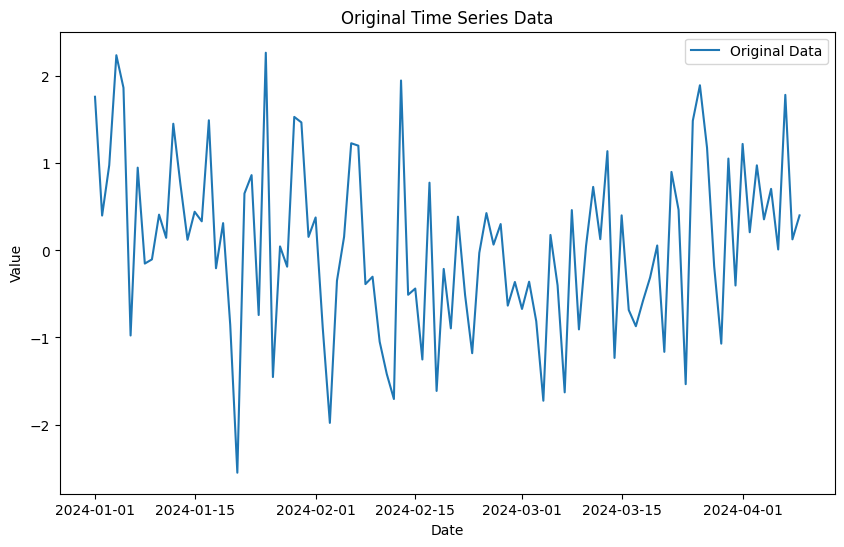

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  100
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -140.906
Date:                Fri, 29 Mar 2024   AIC                            289.812
Time:                        22:15:05   BIC                            300.192
Sample:                    01-01-2024   HQIC                           294.012
                         - 04-09-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0390      0.116     -0.336      0.737      -0.267       0.188
ar.L2          0.0362      0.133      0.272      0.785      -0.224       0.297
ma.L1         -0.8983      0.066    -13.532      0.0

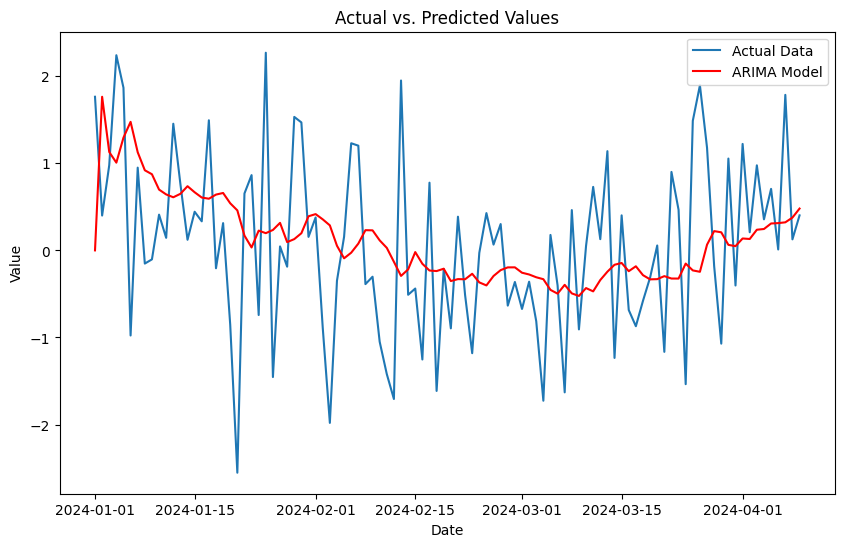

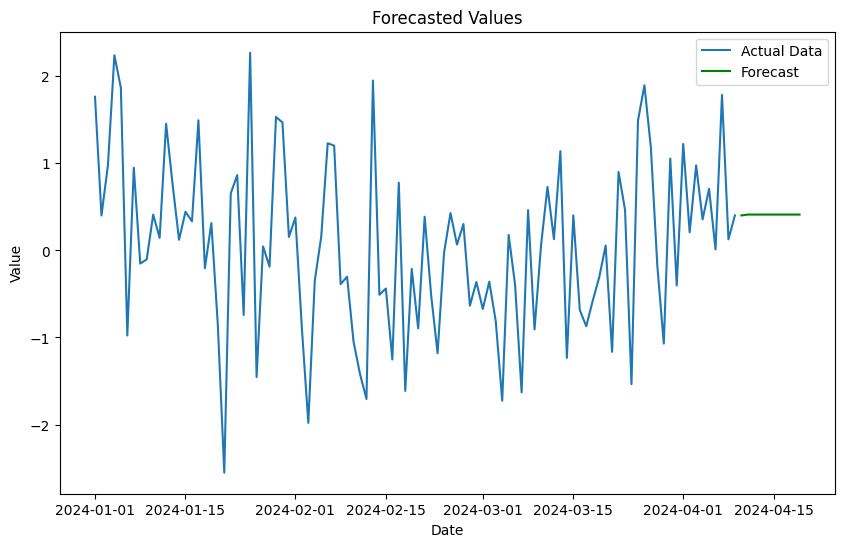

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

np.random.seed(0)
dates = pd.date_range(start='2024-01-01', periods=100)
values = np.random.randn(100)
df = pd.DataFrame({'date': dates, 'value': values})
df.set_index('date', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['value'], label='Original Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original Time Series Data')
plt.legend()
plt.show()

p = 2
d = 1
q = 1
model = sm.tsa.ARIMA(df['value'], order=(p, d, q))
results = model.fit()

print(results.summary())

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['value'], label='Actual Data')
plt.plot(df.index, results.fittedvalues, label='ARIMA Model', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

forecast_steps = 10
forecast = results.forecast(steps=forecast_steps)

forecast_dates = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq='D')[1:]
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['value'], label='Actual Data')
plt.plot(forecast_dates, forecast, label='Forecast', color='green')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Forecasted Values')
plt.legend()
plt.show()
